In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets
%matplotlib widget

In [45]:
class Worker:
    def __init__(self, worker_id, surname, brig_id):
        self.worker_id = worker_id
        self.surname = surname
        self.brig_id = brig_id
    
    @property
    def worker_id(self):
        return self._worker_id
    @worker_id.setter
    def worker_id(self, x):
        self._worker_id = x
        
    @property
    def surname(self):
        return self._surname
    @surname.setter
    def surname(self, x):
        self._surname = x
        
    @property
    def brig_id(self):
        return self._brig_id
    @brig_id.setter
    def brig_id(self, x):
        self._brig_id = x

In [47]:
class Brigade:
    def __init__(self, brgg_id, brig_name, salarry):
        self.brgg_id = brgg_id
        self.brig_name = brig_name
        self.salarry = salarry
    
    @property
    def brgg_id(self):
        return self._brgg_id
    @brgg_id.setter
    def brgg_id(self, x):
        self._brgg_id = x
        
    @property
    def brig_name(self):
        return self._brig_name
    @brig_name.setter
    def brig_name(self, x):
        self._brig_name = x
        
    @property
    def salarry(self):
        return self._salarry
    @salarry.setter
    def salarry(self, x):
        self._salarry = x

In [49]:
class Nariad:
    def __init__(self, date, w_id, time, auto):
        self.date = date
        self.w_id = w_id
        self.time = time
        self.auto = auto
    
    @property
    def date(self):
        return self._date
    @date.setter
    def date(self, x):
        self._date = x
        
    @property
    def w_id(self):
        return self._w_id
    @w_id.setter
    def w_id(self, x):
        self._w_id = x
        
    @property
    def time(self):
        return self._time
    @time.setter
    def time(self, x):
        self._time = x
        
    @property
    def auto(self):
        return self._auto
    @auto.setter
    def auto(self, x):
        self._auto = x

In [2]:
workers = pd.read_csv('workers.csv')

In [3]:
workers

,worker_id,surname,brig_id
0,1,Romantsov,1
1,2,Marshenko,3
2,3,Kovalov,3
3,4,Ivanov,2
4,5,Homenko,2


In [4]:
brigades = pd.read_csv('brigades.csv')

In [5]:
brigades

,brgg_id,brig_name,salarry
0,1,QWERTY,65
1,2,NUMONE,70
2,3,FUS,90


In [6]:
nariads = pd.read_csv('nariads.csv')
nar2 = pd.read_csv('nar2.csv')

nariads = pd.concat([nariads, nar2], ignore_index = True)

In [7]:
nariads

,date,w_id,time,auto
0,2023-12-08,1,12,Deu
1,2023-12-07,3,4,BMW
2,2023-12-09,1,9,Opel
3,2023-12-06,2,8,Tesla
4,2023-12-10,4,7,Audi
5,2023-12-09,5,6,Jeep
6,2023-12-10,2,9,Tesla
7,2023-12-11,3,3,Opel


In [31]:
#а
mod_brigs = pd.merge(workers, brigades, left_on='brig_id', right_on='brgg_id').drop("brgg_id", axis = 1)
mod_brigs

,worker_id,surname,brig_id,brig_name,salarry
0,1,Romantsov,1,QWERTY,65
1,2,Marshenko,3,FUS,90
2,3,Kovalov,3,FUS,90
3,4,Ivanov,2,NUMONE,70
4,5,Homenko,2,NUMONE,70


In [9]:
brigs = mod_brigs["brig_name"].unique()
total_ern = []
for it in brigs:
    temp = mod_brigs[mod_brigs['brig_name'] == it]
    temp = pd.merge(nariads, temp, left_on='w_id', right_on='worker_id').drop("w_id", axis = 1)
    temp["total_price"] = temp["salarry"]*temp["time"]
    total_ern.append(temp["total_price"].sum())
df = pd.DataFrame({"Brig_name" : brigs, "total" : total_ern})
df

,Brig_name,total
0,QWERTY,1365
1,FUS,2160
2,NUMONE,910


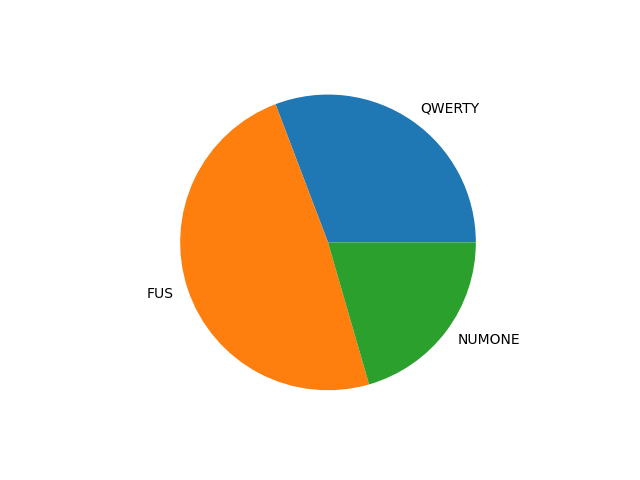

In [10]:
#б
plt.pie(df["total"], labels = df["Brig_name"])
plt.show()

In [11]:
#В
wd1 = ipywidgets.DatePicker()
wd2 = ipywidgets.DatePicker()

In [23]:
def sal_date(fir_d, sec_d, df):
    if(fir_d>sec_d):
        print("Wrong Date")
    else:
        filtered_data = df[(df['date'] >= str(fir_d)) & (df['date'] <= str(sec_d))]
        temp = pd.merge(filtered_data, mod_brigs, left_on='w_id', right_on='worker_id').drop("w_id", axis = 1)
        temp["total_sallary"] = temp["time"] * temp["salarry"]
        display(temp.groupby('surname')['total_sallary'].sum())

In [24]:
ipywidgets.interact(sal_date, fir_d = wd1, sec_d = wd2, df = ipywidgets.fixed(nariads))

interactive(children=(DatePicker(value=datetime.date(2023, 12, 6), description='fir_d', step=1), DatePicker(va…

<function __main__.sal_date(fir_d, sec_d, df)>

In [32]:
mod_brigs

,worker_id,surname,brig_id,brig_name,salarry
0,1,Romantsov,1,QWERTY,65
1,2,Marshenko,3,FUS,90
2,3,Kovalov,3,FUS,90
3,4,Ivanov,2,NUMONE,70
4,5,Homenko,2,NUMONE,70


In [54]:
#Г
mod_brigs_mod = mod_brigs[["worker_id","salarry"]]
merged = pd.merge(mod_brigs_mod, nariads, left_on='worker_id', right_on='w_id')
merged["Total"] = merged["salarry"] * merged["time"]
merged = merged[["auto","Total"]]
autos = merged["auto"].unique()
totals = []
for it in autos:
    temp = merged[merged["auto"]==it]
    totals.append(temp["Total"].sum())
autos_df = pd.DataFrame({"auto" : autos, "Total" : totals}).sort_values(['Total'], ascending=(False))
autos_df

,auto,Total
2,Tesla,1530
1,Opel,855
0,Deu,780
4,Audi,490
5,Jeep,420
3,BMW,360
